<a href="https://colab.research.google.com/github/turkeshp/Python-Practice/blob/main/News%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [ ]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [ ]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
From (redirected): https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5&confirm=t&uuid=3acd84a4-cba6-46b6-bb06-cd163e9a3c10
To: /content/MM17-WeiboRumorSet.zip
100% 1.35G/1.35G [00:22<00:00, 61.0MB/s]


Unzip and save into folder train_extracted

In [ ]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [ ]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [ ]:
df1.head()

filename  category
0  rumor_images/55d78efajw1e6dcwgqpwuj20go0buwf9.jpg         1
1  rumor_images/4cc12f87gw1e97oewn16qj20p00g8gnr.jpg         1
2  rumor_images/0065Offujw1es83oufo5gj30go0m8abp.jpg         1
3  rumor_images/893eeb6ajw1ervnrmpc63j20no0vkgq8.jpg         1
4  rumor_images/005RinLbjw1ev1g17dvofj30f00qotak.jpg         1

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

In [ ]:
len(df1) # number of rumor images

7954

In [ ]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [ ]:
df2.head()

filename  category
0  nonrumor_images/707e96d5jw1ezaeq7qmkrj20c80lot...         0
1  nonrumor_images/470bf257jw1ewpydz1wmcj20hr0btd...         0
2  nonrumor_images/644471aegw1exk4y0tftvj20c80gaj...         0
3  nonrumor_images/005EHRy1jw1ey2rx9gwsrj30b406hg...         0
4  nonrumor_images/6a5ce645jw1ez8lgtb4jyj20zk0t5w...         0

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

In [ ]:
len(df2) # number of non rumor images

5318

In [ ]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

<ipython-input-12-64df6258ab07>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True).reset_index(drop = True)


In [ ]:
df.head()

filename  category
0  rumor_images/55d78efajw1e6dcwgqpwuj20go0buwf9.jpg         1
1  rumor_images/4cc12f87gw1e97oewn16qj20p00g8gnr.jpg         1
2  rumor_images/0065Offujw1es83oufo5gj30go0m8abp.jpg         1
3  rumor_images/893eeb6ajw1ervnrmpc63j20no0vkgq8.jpg         1
4  rumor_images/005RinLbjw1ev1g17dvofj30f00qotak.jpg         1

In [ ]:
len(df) # combined

13272

In [ ]:
df.describe()

category
count  13272.000000
mean       0.599307
std        0.490057
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

In [ ]:
df.tail()

filename  category
13267  nonrumor_images/61e04755jw1ez9mwhrb1jj20fa0aa7...         0
13268  nonrumor_images/7061c249gw1ezld8hasr3j20f5073g...         0
13269  nonrumor_images/644471aegw1exhu2re3hkj20c80c8t...         0
13270  nonrumor_images/63207a53jw1eyzkbyh7slj20gg09tm...         0
13271  nonrumor_images/61d83ed4jw1ex4ad5oengj20c80c8t...         0

Total count

In [ ]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


<Axes: >

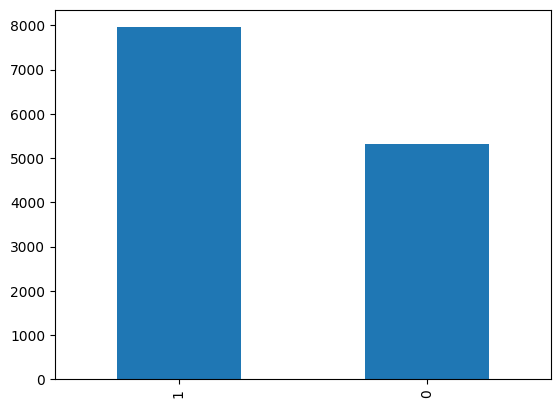

In [ ]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1).reset_index(drop=True)

In [ ]:
df.head()

filename  category
0  nonrumor_images/6541fc49gw1eys8n6z6e3j20fa0bod...         0
1  rumor_images/6f421fbajw1e6xqtsc8wlj20sg0lp412.jpg         1
2  nonrumor_images/63207a53jw1ezaiv6nb74j21bh0qo1...         0
3  rumor_images/676abacdtw1ereipe1l28j20cv081756.jpg         1
4  rumor_images/0065mfIujw1eqnngi3ab3j30f00qodhi.jpg         1

In [ ]:
df.tail()

filename  category
13267  rumor_images/0065Offujw1es83oufo5gj30go0m8abp.jpg         1
13268  rumor_images/005EG0upjw1ev1w8jw23yj30f00qojug.jpg         1
13269  nonrumor_images/75b52ed2jw1ewj5cetv25j20p00go7...         0
13270            rumor_images/6eeeb0c7jw1e0i9r2180uj.jpg         1
13271  nonrumor_images/684ebae3jw1ezc6nwf229j20c80c8t...         0

Make a combined list with rumor and non rumor image paths last part

In [ ]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [ ]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

nonrumor_images/6541fc49gw1eys8n6z6e3j20fa0bodgp.jpg
0
nonrumor_images/684ebae3jw1ezc6nwf229j20c80c8t9u.jpg
0


rumor_images/005QsAX0jw1eqx47s5d0wj30xc18gk1u.jpg


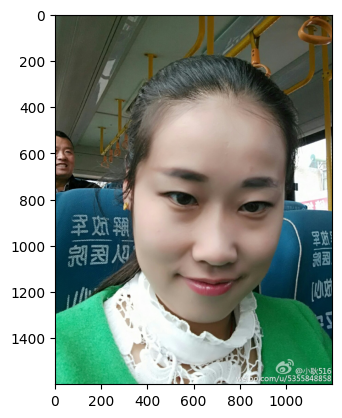

In [ ]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

Build Model


Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [ ]:
earlystop = EarlyStopping(patience=10)

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to rumor and 0 to nonrumor

In [ ]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'})

In [ ]:
df.head()

filename  category
0  nonrumor_images/6541fc49gw1eys8n6z6e3j20fa0bod...  nonrumor
1  rumor_images/6f421fbajw1e6xqtsc8wlj20sg0lp412.jpg     rumor
2  nonrumor_images/63207a53jw1ezaiv6nb74j21bh0qo1...  nonrumor
3  rumor_images/676abacdtw1ereipe1l28j20cv081756.jpg     rumor
4  rumor_images/0065mfIujw1eqnngi3ab3j30f00qodhi.jpg     rumor

Divide into 80% train and 20% test, Note that we have shuffled earlier

In [ ]:
mid = int(len(df)*0.8)
df_train = df[:mid]
df_test = df[mid:]
print(len(df_train))
print(len(df_test))

10617
2655


In [ ]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

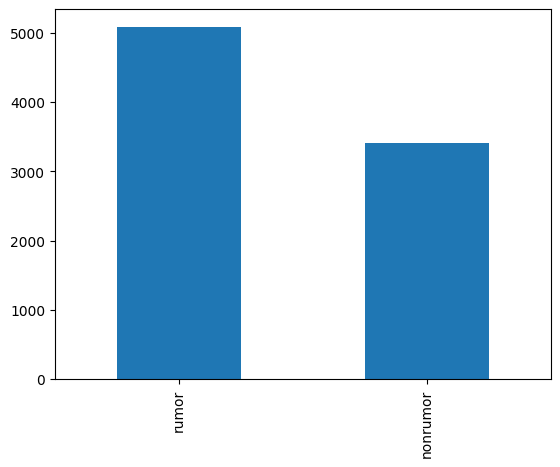

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: >

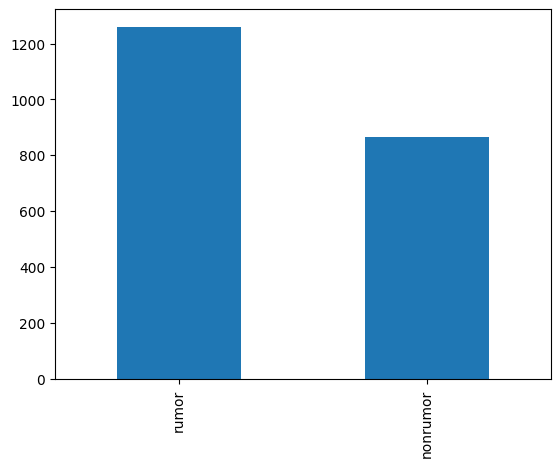

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

Traning Generator

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./train_extracted/MM17-WeiboRumorSet/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8476 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 17 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Validation Generator

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./train_extracted/MM17-WeiboRumorSet/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2121 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


See how our generator work

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./train_extracted/MM17-WeiboRumorSet/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


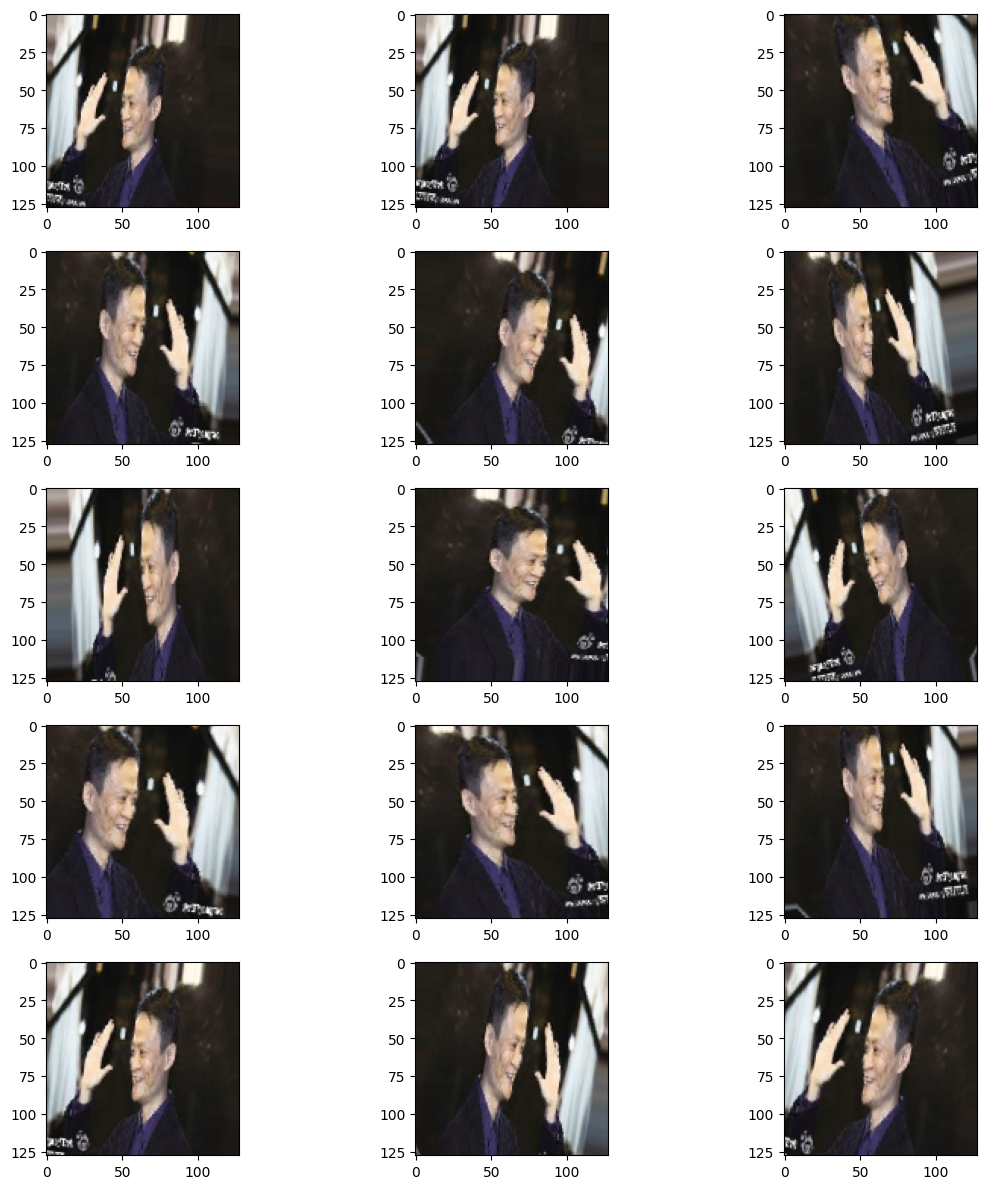

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seems great

Fit Model

In [ ]:
FAST_RUN = False

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-42-63cb34b6e89a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
265/265 [==============================] - 306s 1s/step - loss: 0.9596 - accuracy: 0.5624 - val_loss: 0.6633 - val_accuracy: 0.5980 - lr: 0.0010
Epoch 2/50
265/265 [==============================] - 308s 1s/step - loss: 0.7315 - accuracy: 0.5792 - val_loss: 0.6950 - val_accuracy: 0.5990 - lr: 0.0010
Epoch 3/50
265/265 [==============================] - 311s 1s/step - loss: 0.6836 - accuracy: 0.6019 - val_loss: 0.6385 - val_accuracy: 0.6174 - lr: 0.0010
Epoch 4/50
265/265 [==============================] - 308s 1s/step - loss: 0.6655 - accuracy: 0.6064 - val_loss: 0.6699 - val_accuracy: 0.6056 - lr: 0.0010
Epoch 5/50
265/265 [==============================] - 312s 1s/step - loss: 0.6571 - accuracy: 0.6131 - val_loss: 0.6430 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 6/50
265/265 [==============================] - 287s 1s/step - loss: 0.6492 - accuracy: 0.6228 - val_loss: 0.6507 - val_accuracy: 0.6046 - lr: 0.0010
Epoch 7/50
265/265 [==============================] - 296s 1s/st

Save Model

In [ ]:
model.save_weights("model.h5")

In [ ]:
model.save_weights("Rumor_Nonrumor_50epochs_model.h5")

In [ ]:
# saving the dataframe
df.to_csv('df_5331.csv')

In [ ]:
# saving the dataframe
df_train.to_csv('df_train_5331.csv')
# saving the dataframe
df_test.to_csv('df_test_5331.csv')

In [ ]:
from google.colab import files
files.download('Rumor_Nonrumor_50epochs_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('df_5331.csv')
files.download('df_train_5331.csv')
files.download('df_test_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Visualize Training

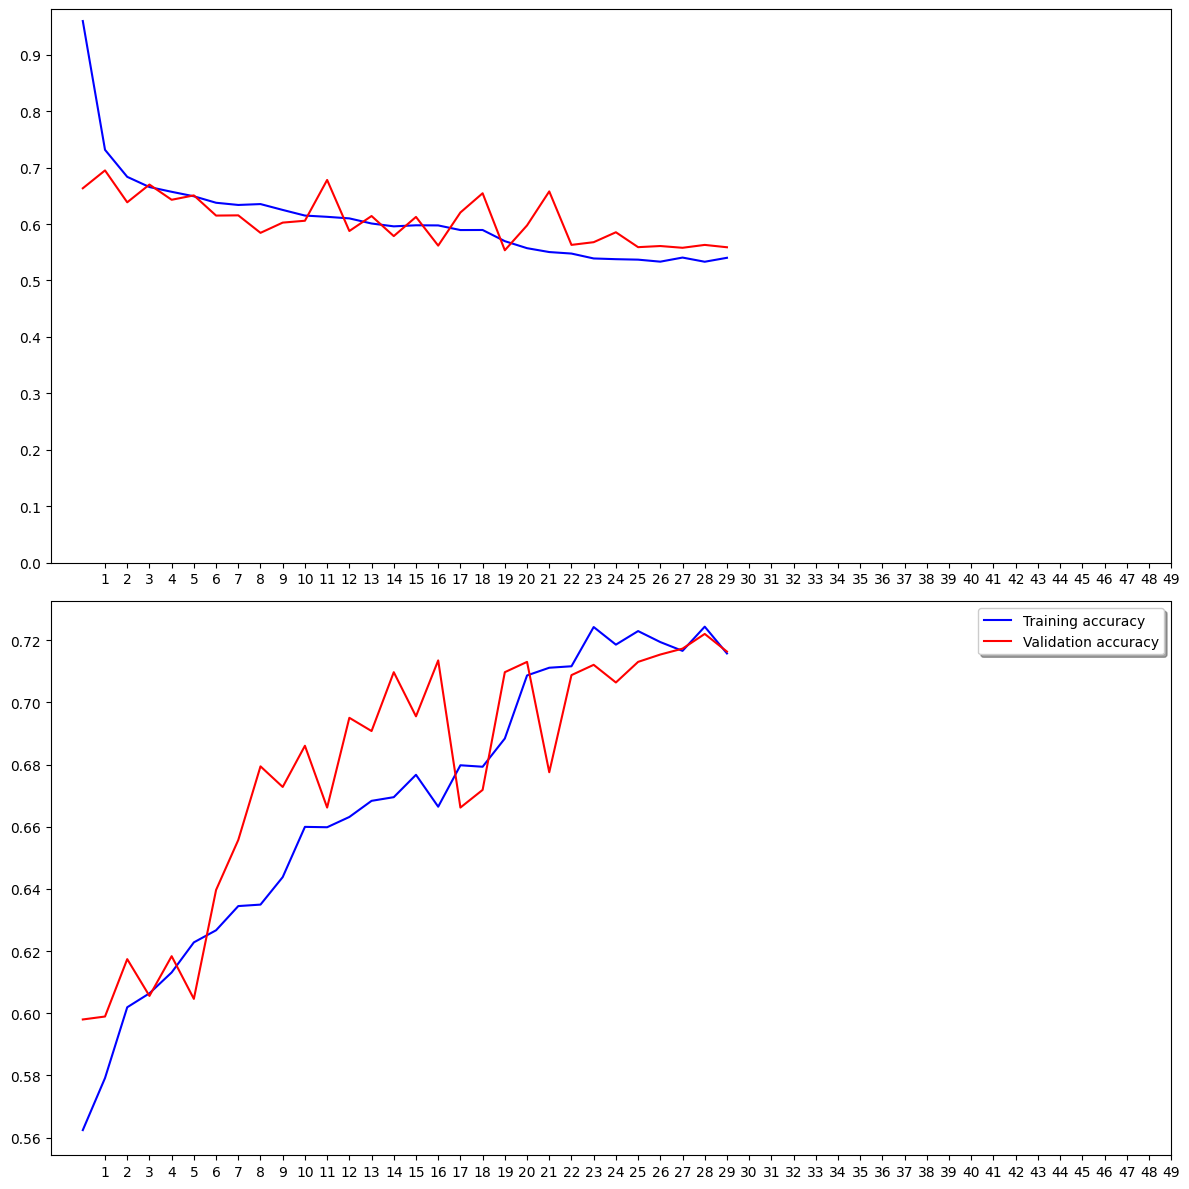

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Prepare Testing Data

In [ ]:
df_test.head()


filename category
10617  rumor_images/6b92ad47jw1ebcketjagcj20hs0vk41p.jpg    rumor
10618  rumor_images/63c6ba59jw1ev2ag6a1ssj20f00qo75v.jpg    rumor
10619  rumor_images/703d87c5jw1etizuxnjxmj20f00qogpu.jpg    rumor
10620  rumor_images/975f0a9ajw1ekxoi74qkcj20hs0jpmxr.jpg    rumor
10621  rumor_images/a6bfb705jw1enugqla8u5j20gv0u0ta9.jpg    rumor

In [ ]:
df_test = df_test.reset_index(drop = True)

In [ ]:
test_filenames = []
test_categories = []
for i in range(0,len(df_test)):
  test_filenames.append(df_test['filename'][i])
  test_categories.append(df_test['category'][i])
print(len(test_filenames))

2655


In [ ]:
test_df = df_test
nb_samples = test_df.shape[0]

Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "./train_extracted/MM17-WeiboRumorSet/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
    validate_filenames=False
)

Found 2655 non-validated image filenames.


Predict

In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

83/83 [==============================] - 24s 281ms/step


In [ ]:
print(predict)

[[0.5429796  0.45702025]
 [0.05301523 0.94698477]
 [0.0774665  0.92253345]
 ...
 [0.7481848  0.25181523]
 [0.30360615 0.6963938 ]
 [0.18385573 0.81614435]]


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category_predicted'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category_predicted'] = test_df['category_predicted'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category_predicted'] = test_df['category_predicted'].replace({ 'rumor': 1, 'nonrumor': 0 })
test_df['category'] = test_df['category'].replace({ 'rumor': 1, 'nonrumor': 0 })

Virtaulize Result

<Axes: >

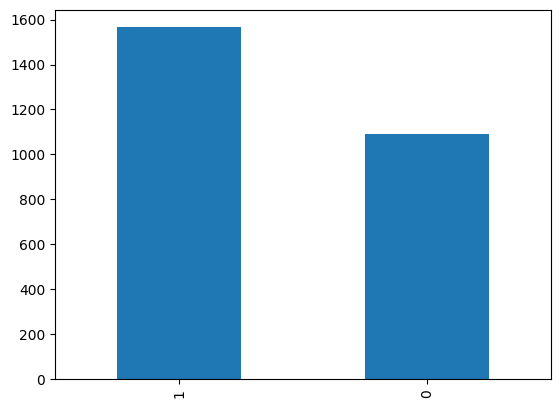

In [ ]:
test_df['category_predicted'].value_counts().plot.bar()

<Axes: >

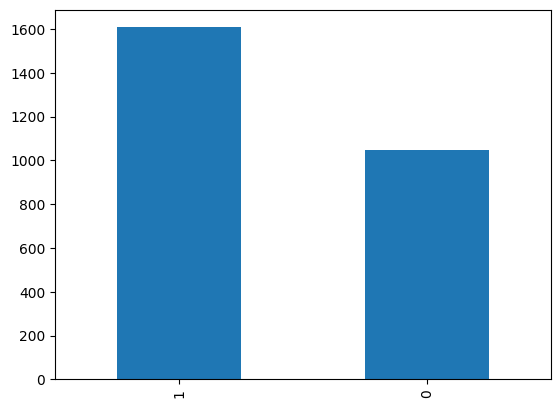

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
y_pred = test_df['category_predicted']
y_true = test_df['category']

In [ ]:
from sklearn.metrics import accuracy_score # normal accuracy
from sklearn.metrics import balanced_accuracy_score # used in case of imbalanced data sets, average of recall, from 0 to 1
from sklearn.metrics import confusion_matrix # division of performance on the multilabels
from sklearn.metrics import cohen_kappa_score # compares model against random prediction, from -1 to 1
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['class 0', 'class 1']

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:" , balanced_accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))

print('CNN Only')
print_metrics(y_true, y_pred)

CNN Only
Accuracy: 0.7239171374764595
Balanced Accuracy: 0.7145967868394418
Confusion Matrix:
 [[ 702  345]
 [ 388 1220]]
Cohen Kappa Score: 0.4261406108322091
Classification Report:
               precision    recall  f1-score   support

     class 0       0.64      0.67      0.66      1047
     class 1       0.78      0.76      0.77      1608

    accuracy                           0.72      2655
   macro avg       0.71      0.71      0.71      2655
weighted avg       0.73      0.72      0.72      2655



See predicted result with images

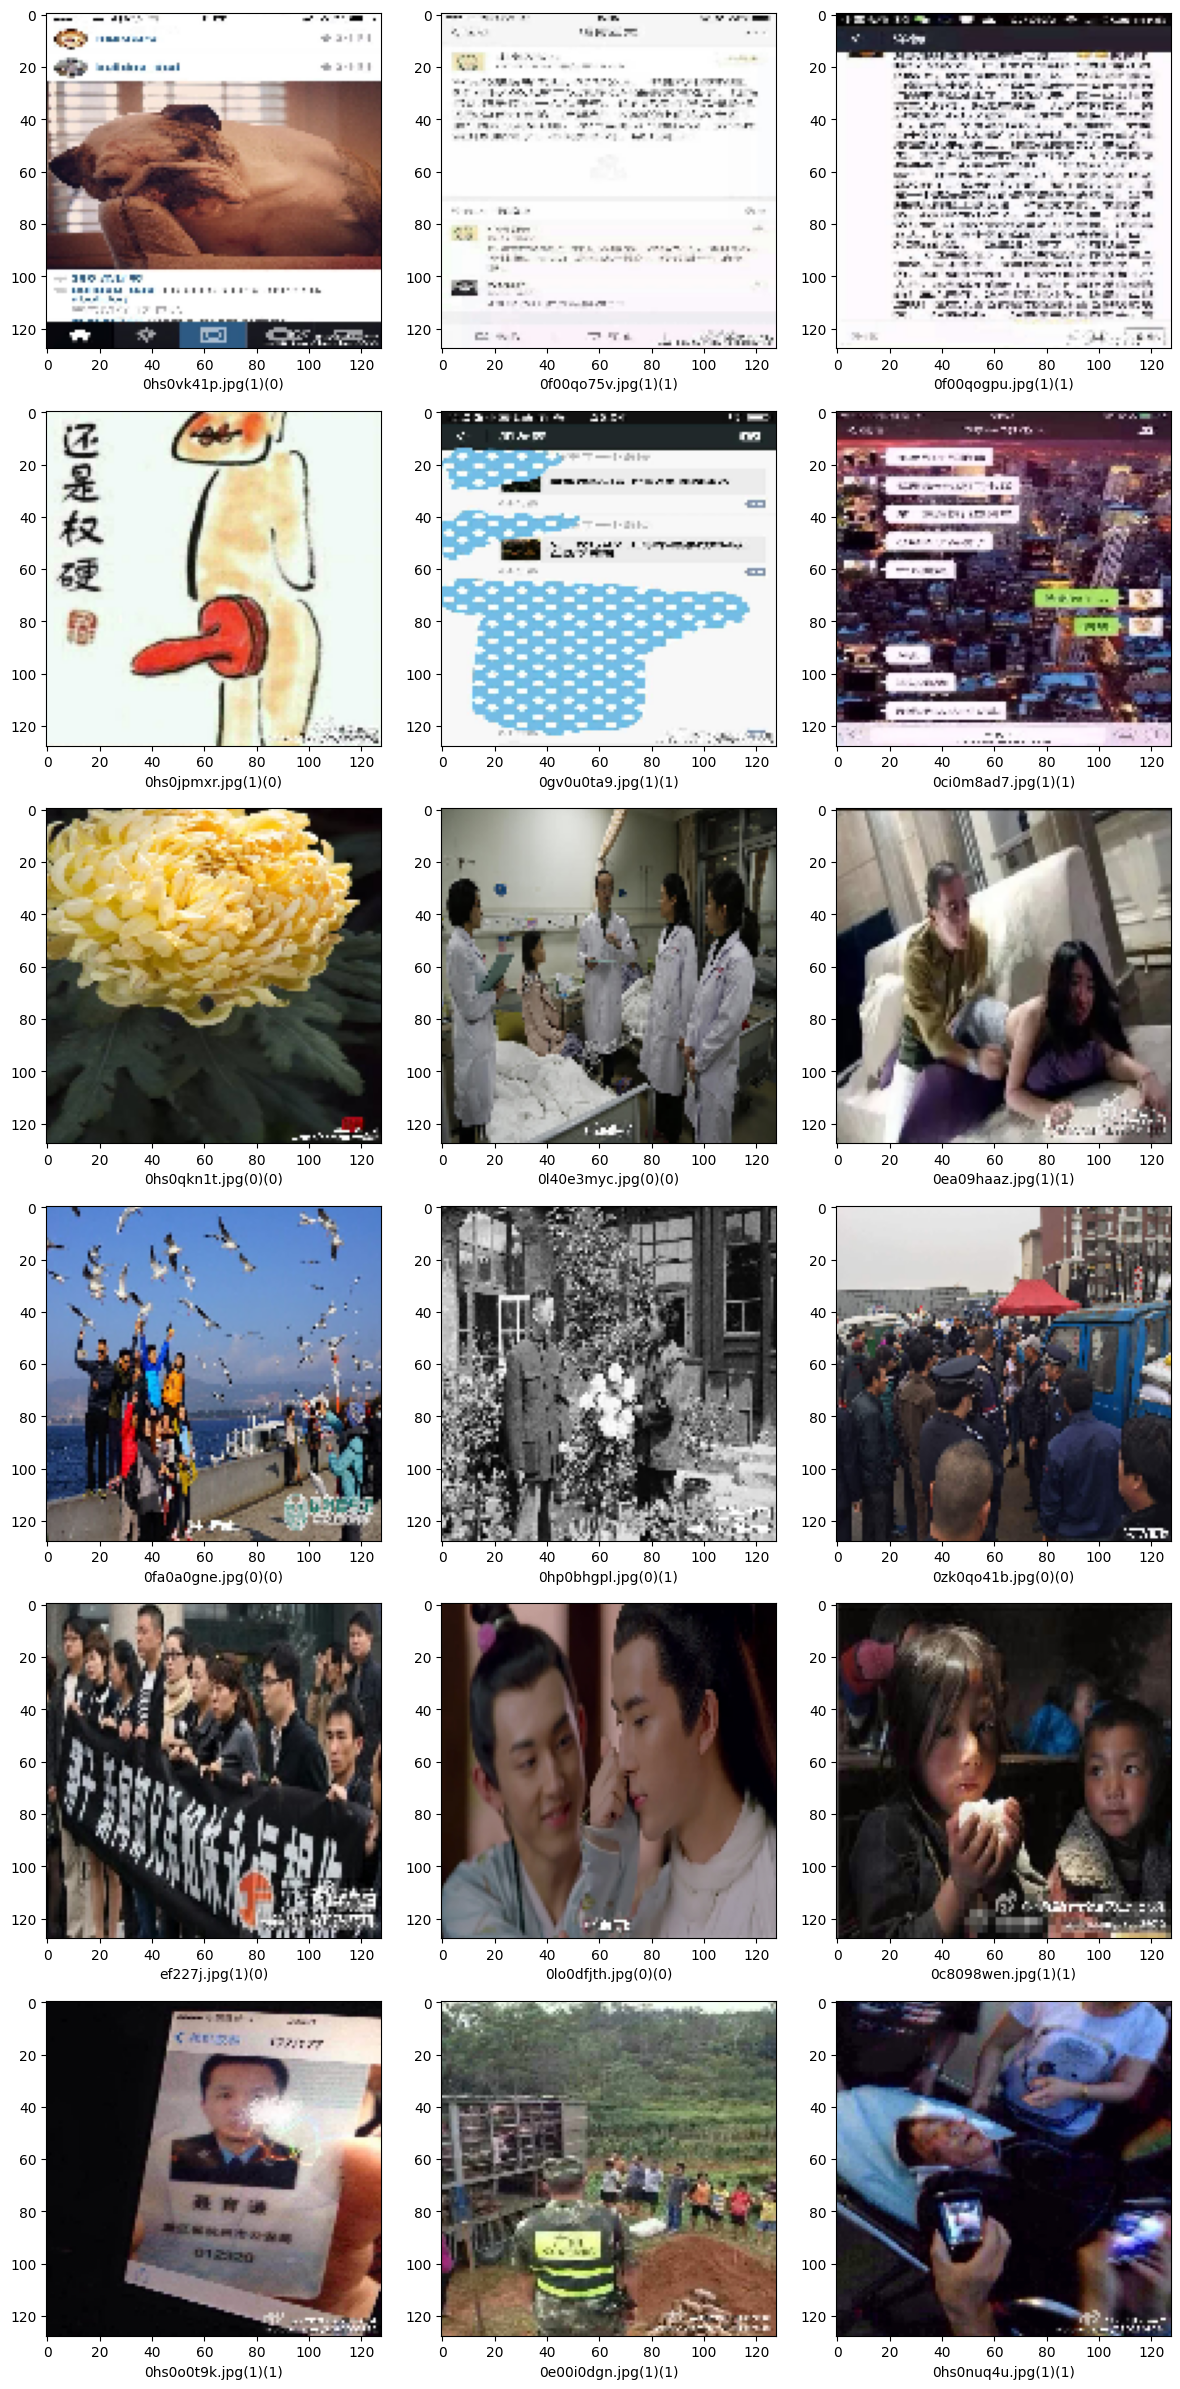

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    category_predicted = row['category_predicted']
    img = load_img("./train_extracted/MM17-WeiboRumorSet/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename[int(3*len(filename)/4):] + '(' + "{}".format(category) + ')' + '(' + "{}".format(category_predicted) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
# saving the dataframe of our results
test_df.to_csv('test_df_5331.csv')
files.download('test_df_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>